# This module provides an example of loading and plotting MEDUSA ouputs #

### The exercise will introduce xarray and provide a first look at the MEDUSA domain ###

First, we have the preamble

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import matplotlib
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter


# set default font size
matplotlib.rcParams.update({"font.size": 8})

In [2]:
# set path and file name 
path = '/gws/pw/j07/workshop/users/ayool/eORCA1/'
fn = 'eORCA1_MED_UKESM_y2020s_m01_ptrc_T.nc' # for january only 

# get data
ds = xr.open_dataset(path+fn, chunks=-1)

### Subsetting the data 

There are two main routes for subsetting the data with Xarray, by index label (.sel) and by index (.isel). The data monthly output for year 1850 and we can view its contents without any loading.

In [3]:
ds

<xarray.Dataset>
Dimensions:               (y: 332, x: 362, deptht: 75, axis_nbounds: 2,
                           time_counter: 1)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
  * deptht                (deptht) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    time_centered         (time_counter) object dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter          (time_counter) object 1850-01-16 00:00:00
Dimensions without coordinates: y, x, axis_nbounds
Data variables: (12/34)
    deptht_bounds         (deptht, axis_nbounds) float32 dask.array<chunksize=(75, 2), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    CHN                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 75, 332, 362), meta=np.ndarray>
    CHN_E3T               (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 75, 332, 362), meta=np.ndarray>
    CHD                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 75, 332, 362), meta=np.ndarray>
    ...                    ...
    ALK                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 75, 332, 362), meta=np.ndarray>
    ALK_E3T               (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 75, 332, 362), meta=np.ndarray>
    OXY                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 75, 332, 362), meta=np.ndarray>
    OXY_E3T               (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 75, 332, 362), meta=np.ndarray>
    OMD                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 75, 332, 362), meta=np.ndarray>
    OMD_E3T               (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 75, 332, 362), meta=np.ndarray>
Attributes:
    name:         eORCA1_MED_UKESM_1m_18500101_18791230_ptrc_T
    description:  Medusa sms variables
    title:        Medusa sms variables
    Conventions:  CF-1.6
    timeStamp:    2021-Aug-26 10:51:54 GMT
    uuid:         b04198dc-fbd9-4f9e-abc9-511d9b97eb6e
    history:      Fri Aug 27 09:38:14 2021: /work/n01/n01/acc/TOOLS/bin/ncks ...
    NCO:          netCDF Operators version 4.9.5 (Homepage = http://nco.sf.ne...

We have already select january for our month:

This opperation leaves length 1 time_counter dimension, and we'll now remove this.

In [4]:
# remove dims length 1
ds_t0 = ds.squeeze()

We can also subset by index

In [5]:
# subsetting data - by index
ds_t0_surf = ds_t0.isel(deptht=0)

This leave us with dimension of x and y for the surface and we are ready to view the fields. Xarray has its own built in quick plot functions and we'll demonstrate this by plotting chlorophyll from non-diatom phytoplankton.


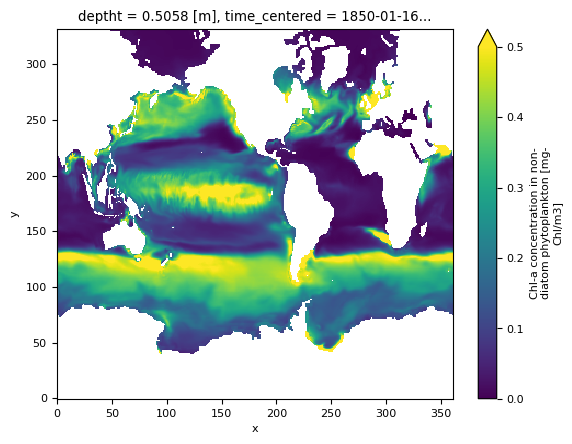

In [6]:
chn_raw= ds_t0_surf.CHN
chd_raw= ds_t0_surf.CHD

# Mask out the land by making all the values less than 1e-25 = NaN
chn_clean= chn_raw.where(chn_raw >1e-25)
chd_clean= chd_raw.where(chd_raw >1e-25)

# plot it quickly (example non diatom chlorophyll)
chn_clean.plot(vmin=0, vmax=0.5)

## Plotting ##
The plotting below is included for those who wish to see more techniques with matplotlib and cartopy. However, we assume general familarity with matplotlib and we add this for reference.

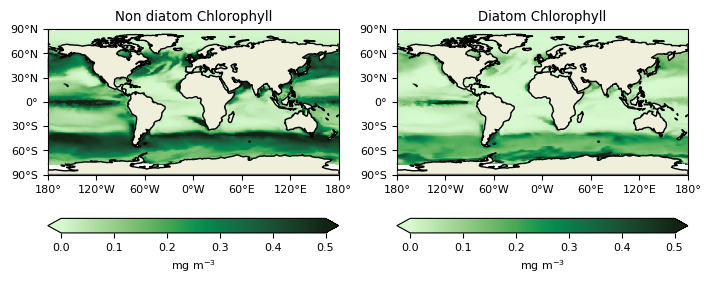

In [29]:
# set axes
plt_proj = ccrs.PlateCarree()
proj_dict = {"projection": plt_proj}
fig, axs = plt.subplots(1, 2, figsize=(8,4), subplot_kw=proj_dict)
plt.subplots_adjust(left=0.10, right=0.90, top=0.95, bottom=0.22)

# set colour bar limits
cmin, cmax = 0, 0.5

# Set titles, and what we are going to plot
titles=['Non diatom Chlorophyll','Diatom Chlorophyll']
chlor= [chn_clean, chd_clean]

for i, ax in enumerate(axs):
    # Plotting chlorophyll using xarray, but in tidier manner, so we let xarray know 
    # the lat and long, colour scheme (cmocean.cm.algae), and transform it to a map
    pn = chlor[i].plot(x='nav_lon', y='nav_lat', ax=ax, 
                   vmin=cmin, vmax=cmax, transform=plt_proj, 
                   cmap=cmocean.cm.algae, add_labels=False, add_colorbar=False)

    # Let's create our own colorbar
    cb= plt.colorbar(pn, ax=ax, extend='both', orientation='horizontal')
    cb.ax.set_xlabel('mg m$^{-3}$')
    
    # Add Land
    ax.add_feature(cfeature.LAND, zorder=100, edgecolor='k')  
    # Add title
    ax.set_title(titles[i])
    # Set domain bounds (to add Lat and Long)
    ax.set_xlim(ds_t0.nav_lon.min().values,ds_t0.nav_lon.max().values)
    ax.set_ylim(ds_t0.nav_lat.min().values,ds_t0.nav_lat.max().values)


    # set axis ticks 
    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

